## Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2022
## Gordus Lab 
## February 18, 2022

#  Distributions and Approximations

In class, we discussed the binomial distribution, and how if we have a large N, it approximates a continuous distribution that can approximate a Gaussian distribution. We also discussed some useful approximations: Sterlings approximation & the Taylor Expansion. In this lab, you will explore the properties of these distributions and approximations to hopefully gain a better understanding of their properties.

# Libraries you will need

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
from scipy.stats import binom
from scipy.stats import norm


# Problem 1 The Binomial Distribution

As I mentioned in class, this is a useful distribution when making predictions for binary phenomena. A common problem encountered in biology is making crosses, and deciding how many animals to screen for a particular genotype. Here is a common scenario:

You want to make a double recessive mutant for alleles A & B.

First, you cross mutant A with mutant B:

P0 generation: aaBB x AAbb

This produces heterozygous progeny:

F1 generation: AaBb

You then take siblings from this generation and cross them.

**What is the probability of finding an F2 animal that is homozygous recessive for A (i.e. aa)?**

## Student Input Cell

In [2]:
aa = 1/4

**What is the probability of finding an F2 animal that is homozygous recessive for B (i.e. bb)?**

## Student Input Cell

In [3]:
bb = 1/4

**What is the probability of finding an F2 animal that is homozygous recessive for BOTH A & B?**

## Student Input Cell

In [4]:
aabb = aa * bb

Let's look at the possible outcomes of picking 20 animals.

**Given the above probability, what is the expected mean (µ) probability for picking a double homozygous recessive animal if you pick 20 animals total? What is the standard deviation (σ^2)?**

## Student Input Cell

In [15]:
expected_mean = 20 * aabb
expected_std = np.sqrt(20*aabb*(1-aabb))
print('Expected mean: ' + str(expected_mean))
print('Expected standard deviation: ' + str(expected_std))

Expected mean: 1.25
Expected standard deviation: 1.0825317547305484


**Now let's plot what this distribution of possible outcomes looks like for picking 0->20 animals.**

To make the coding easier, rather than coding the entire formula from class, you can use scipy's `binom.pmf` function which you imported above.

`P = binom.pmf(k, N, p)`

Check to see whether the values for your mean and standard deviation match what you expect with your distribution.


## Student Input Cell

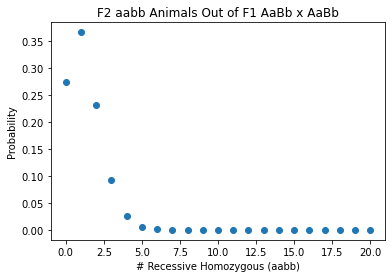

In [18]:
# k needs to be integers

k = np.arange(0,21)
N = 20
p = aabb

dist = binom.pmf(k, N, p)


# Plot binomial distribution
# Since this is a DISCRETE distribution, you should plot markers, and not lines.
# i.e. plt.plot(k,p,'o')
plt.plot(k, dist,'o')
plt.xlabel('# Recessive Homozygous (aabb)')
plt.ylabel('Probability')
plt.title('F2 aabb Animals Out of AaBb x AaBb')
plt.show()

**What is the probability of NOT finding an aabb F2?**

## Student Input Cell

In [20]:
dist[0]

0.2750587898883363

**What is the probability of picking AT LEAST 1 aabb F2?**

## Student Input Cell

In [21]:
at_least_one = 1 - dist[0]
at_least_one

0.7249412101116637

Let's see how the binomial distribution compares to the Gaussian distribution. For this, we will also use a convenient scipy function `norm.pdf` that you imported above. The inputs are k,mean (µ), and variance (the SQUARE ROOT of the standard deviation).

`P = norm.pdf(k, mu, np.sqrt(sigma2))`

**Compare the binomial and Gaussian distributions for `N = 5, 10, 20, 50`, and `p = 0.5`.**

**For each N:**

1. Calculate the expected mean.
2. Calculate the expected standard deviation.
3. Make a subplot with 4 different panels.
3. Plot the binomial distribution for the span of N. **'k' should be integers.** Use markers ('o') for this plot.
4. Plot the corresponding Gaussian distribution for the span of N as a line. **'k' does not need to be integers.**

## Student Input Cell

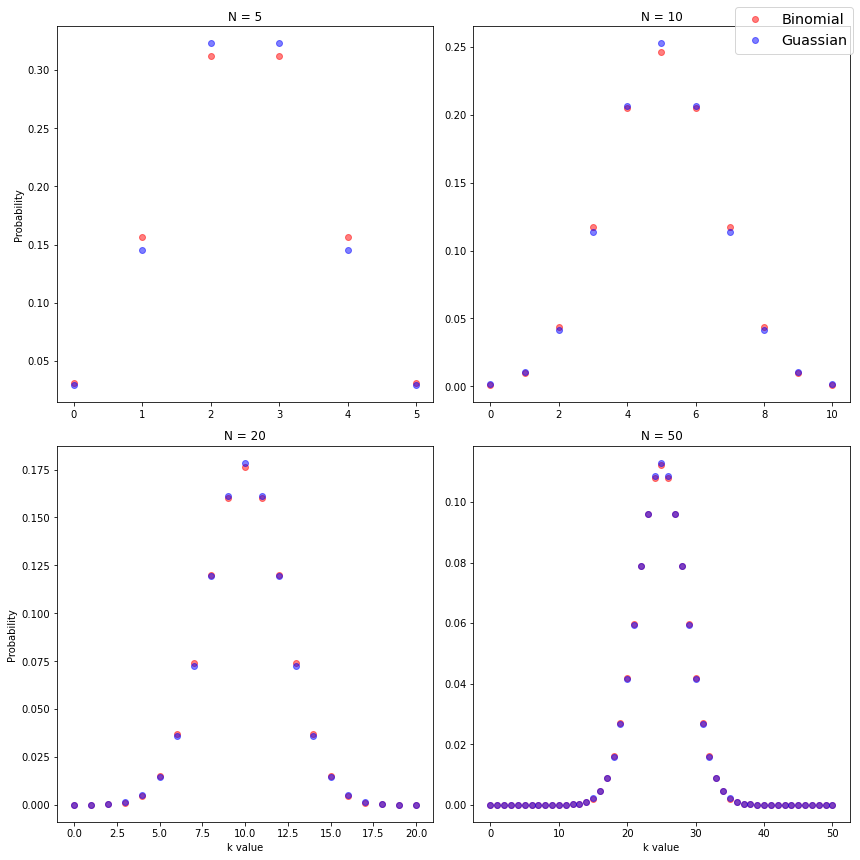

In [35]:
N = [5, 10, 20, 50]
p = 0.5
fig, ax = plt.subplots(2,2,figsize=(12,12))

for i in range(4):
    n = N[i]
    k = np.arange(0,n+1)
    mean = p*n
    std = np.sqrt(n*p*(1-p))
    bi = binom.pmf(k, n, p)
    guass = norm.pdf(k, mean, std)
    
    a = i // 2
    b = i % 2
    ax[a,b].set_title('N = ' + str(n))
    ax[a,b].plot(k, bi, 'o', color='r', alpha=0.5)
    ax[a,b].plot(k, guass, 'o', color='b', alpha=0.5)
    
    if a == 1:
        ax[a,b].set_xlabel('k value')
    if b == 0:
        ax[a,b].set_ylabel('Probability')

fig.legend(['Binomial', 'Guassian'], fontsize='x-large')
plt.tight_layout()
plt.show()

# Problem 2 Stirling's Approximation

In class, I discussed that Stirling's approximation is a good approximation of N!. Let's see how accurate that statement is. The values of N! grow SUPER LARGE as N grows, so we will compare ln(N!) to Stirling's approximation of ln(N!).

Numpy has a factorial function, but it only accepts scalar inputs. To make your life easier, I have had you import scipy's `factorial` function above, which accepts vector inputs.

Example:

`N = [1,2]`


`N_factorial = factorial(N)`

**Make 2 Plots:**

1. Plot N vs ln(N!), and N vs. Stirling's Approximation of ln(N!) in the same axes.

2. Plot N vs. the ratio of absolute difference between ln(N!) and Stirling's approximation to ln(N!).

  i.e. |N! - Stirling| / N!

**Have N span 2 to 20. REMEMBER: The values of N must be integers.**

## Student Input Cell

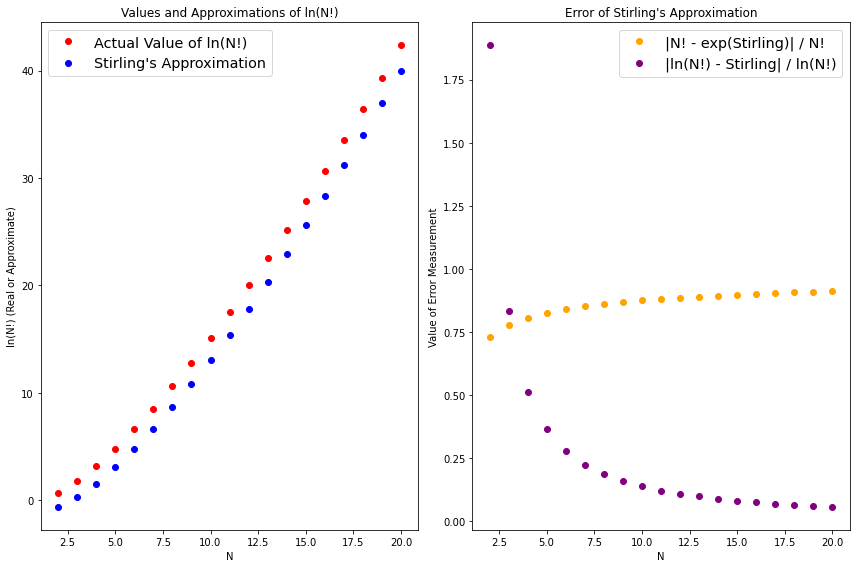

In [55]:
fig, ax = plt.subplots(1,2, figsize=(12,8))
N = np.arange(2,21)
true_fact = factorial(N)
true_fact_ln = np.log(true_fact)
approx_fact_ln = [n*np.log(n)-n for n in N]

ax[0].plot(N, true_fact_ln, 'o', color='r')
ax[0].plot(N, approx_fact_ln, 'o', color='b')
ax[0].set_title('Values and Approximations of ln(N!)')
ax[0].legend(['Actual Value of ln(N!)', 'Stirling\'s Approximation'], fontsize='x-large')
ax[0].set_xlabel('N')
ax[0].set_ylabel('ln(N!) (Real or Approximate)')


diff_ratio_real_vals = abs(true_fact-np.exp(approx_fact_ln))/true_fact
diff_ratio_with_ln = abs(true_fact_ln-approx_fact_ln)/true_fact_ln

ax[1].plot(N, diff_ratio_real_vals, 'o', color='orange')
ax[1].plot(N, diff_ratio_with_ln, 'o', color='purple')
ax[1].set_title('Error of Stirling\'s Approximation')
ax[1].legend(['|N! - exp(Stirling)| / N!', '|ln(N!) - Stirling| / ln(N!)'], fontsize='x-large')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Value of Error Measurement')

plt.tight_layout()
plt.show()

# Taylor Approximation

In class, we discussed the Taylor Approximation of a function. It essentially simplifies a complicated function into a sum of polynomials centered at a point of interest ('a').

<img src="http://www.gordus.org/public_images/taylor.png" style="width: 300px;"/>

Biological systems (or any system, really) cannot respond infinitely fast to a stimulus. For example, a protein has a time delay when it binds a molecule, and a time delay when it releases the molecule (the on and off rate). The difference between these rates can be considered the "kernel" that filters the response to the stimulus. Here is an example of a kernel function:

<img src="http://www.gordus.org/public_images/kernel.png" style="width: 200px;"/>

**Let's see what a Taylor Approximation of this function looks like. Please do the following:**

1. Plot the function over the span of 0 to 5.
2. You'll notice it peaks at a certain point. Calculate this point by taking the derivative of the kernel, setting it to 0, and solving for x. This solution will be 'a'.

As a reminder, the derivative of an exponential is:

<img src="http://www.gordus.org/public_images/dxex.png" style="width: 200px;"/>

3. Now calculate an approximation of f(x) centered at 'a' by taking the Taylor Approximation to the 1st derivative.
4. Calculate an approximation centered at 'a' again, but calculate the Taylor approximation up to the second derivative.
5. Plot f(x), and both approximations centered at 'a'. You'll want to set the y limit from 0 to f(a)+0.1 so you can see their relationships better. How good is the approximation near a? Far from it?
6. Re-perform steps 3-5, but now calculate the approximation at b = a + 0.1.

**To make this easier, I advise that you create 3 functions to calculate f(x), the first derivative, and the second derivative.**

## Student Input Cell

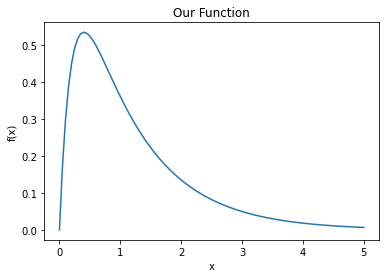

In [57]:
def f(x):
    # Actual function
    return np.exp(-x)-np.exp(-5*x)

def f_1(x):
    # First derivative
    return -np.exp(-x)+5*np.exp(-5*x)

def f_2(x):
    # Second derivative
    return np.exp(-x)-25*np.exp(-5*x)

x = np.arange(0,101)/20
y = f(x)
plt.plot(x,y)
plt.title('Our Function')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

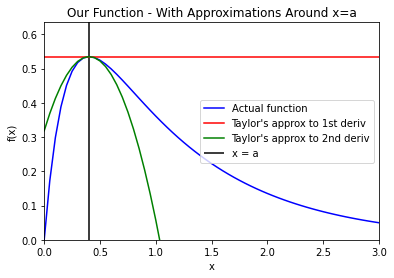

In [66]:
# Solving for x in 0 = -exp(-x) + 5*exp(-5x) gave me x=a=0.25*ln(5)
a = 0.25*np.log(5)

taylor_first = f(a) + f_1(a)*(x-a)
taylor_second = taylor_first + .5 * f_2(a) * (x-a)**2

plt.plot(x, y, color='b')
plt.plot(x, taylor_first, color='r')
plt.plot(x, taylor_second, color='g')
plt.vlines(a, 0, f(a)+0.1, color='black')

plt.xlim([0,3])
plt.ylim([0, f(a)+0.1])
plt.title('Our Function - With Approximations Around x=a')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Actual function', 'Taylor\'s approx to 1st deriv', 'Taylor\'s approx to 2nd deriv', 'x = a'])

plt.show()

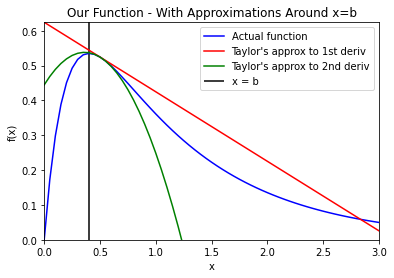

In [68]:
b = a + 0.1

taylor_first = f(b) + f_1(b)*(x-b)
taylor_second = taylor_first + .5 * f_2(b) * (x-b)**2

plt.plot(x, y, color='b')
plt.plot(x, taylor_first, color='r')
plt.plot(x, taylor_second, color='g')
plt.vlines(a, 0, f(b)+0.1, color='black')

plt.xlim([0,3])
plt.ylim([0, f(b)+0.1])
plt.title('Our Function - With Approximations Around x=b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Actual function', 'Taylor\'s approx to 1st deriv', 'Taylor\'s approx to 2nd deriv', 'x = b'])

plt.show()